# Pipelines, Grid Search and Text Mining

In [1]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob

# Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

## Dataset

The Red Wine Quality dataset from Kaggle that can be found [here](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009#)

In [2]:
# Load the dataset
df = pd.read_csv('winequality-red.csv',sep=',')

In [3]:
# Dataset view
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Dataset description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Features and target variable

In [7]:
# Target variable
target = 'quality'
Y = df[target]

In [8]:
# Features 
X = df.drop([target],axis=1)
features = X.columns

In [9]:
# Imbalance of the target variable
df[target].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

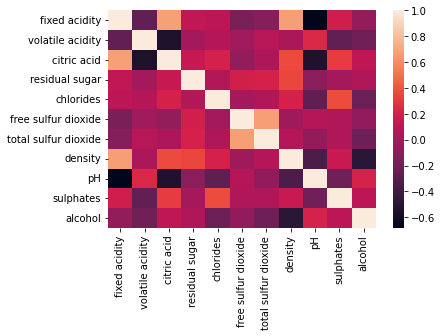

In [10]:
# Correlation of features
sns.heatmap(X.corr())

## Training of the model

In [11]:
# Pipeline
steps = [
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=1))
]
pipeline = Pipeline(steps)

In [12]:
# Grid
param_grid = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [5, 10, 15],
    "classifier__criterion": ["gini", "entropy"],
}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify=Y)

In [14]:
# Fit the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 15],
                         'classifier__n_estimators': [100, 200, 500]})

## Performance of the model

In [15]:
# Best parameters of the grid search
grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 15,
 'classifier__n_estimators': 100}

In [16]:
# Best model of the grid search
model = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, random_state=1)

In [17]:
# Socre of the best model
model.score(X_test, y_test)

0.703125

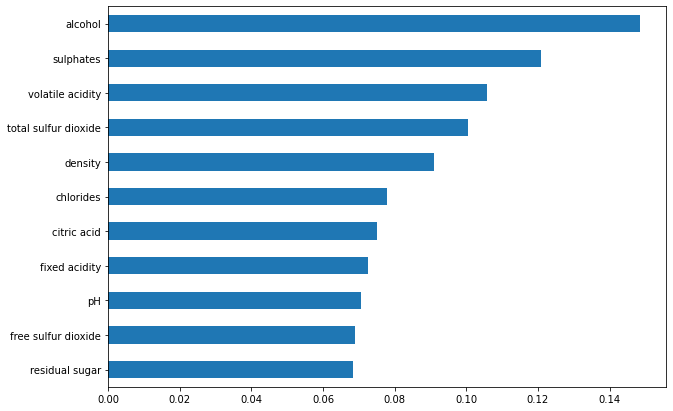

In [18]:
# Feature importances of the best model
plt.figure(figsize=(10,7))
feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feature_importances.sort_values().plot(kind='barh');

# Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

## Dataset

The first chapter of The Philosopher's Stone of J.K. Rowling that can be found [here](https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt)

In [19]:
with open('Book 1 - The Philosopher\'s Stone.txt') as fh:
    book = fh.read()

## Word frequency

In [20]:
# Word tokenization
tokenized_book = word_tokenize(book)

In [21]:
# Remove punctuation
tokenized_book = [word for word in tokenized_book if word.isalnum()]

In [22]:
# Frequency
fdist = FreqDist(tokenized_book)

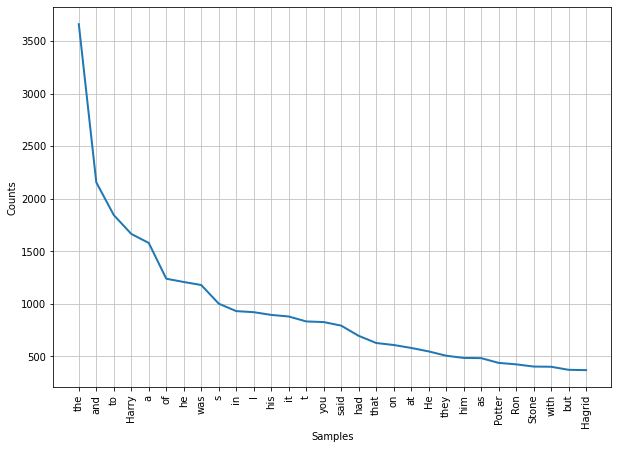

In [23]:
# 30 most common words
plt.figure(figsize=(10,7))
fdist.plot(30, cumulative=False)
plt.show()

# Exercici 3

Treu les stopwords i realitza stemming al teu conjunt de dades.

## Stop words

In [24]:
# Stop words
stop_words = set(stopwords.words("english"))

In [25]:
# Remove stop words
filtered_book = [w for w in tokenized_book  if w not in stop_words]

In [26]:
# Word frequency
fdist = FreqDist(filtered_book)

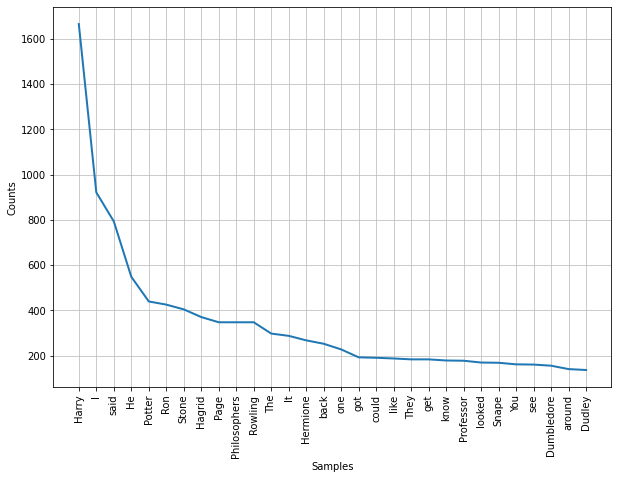

In [27]:
# 30 most common words
plt.figure(figsize=(10,7))
fdist.plot(30, cumulative=False)
plt.show()

## Stemming

In [28]:
# Stemming
ps = PorterStemmer()

In [29]:
# Stemmed book
stemmed_book=[ps.stem(w) for w in filtered_book]

In [30]:
# Word frequency
fdist = FreqDist(stemmed_book)

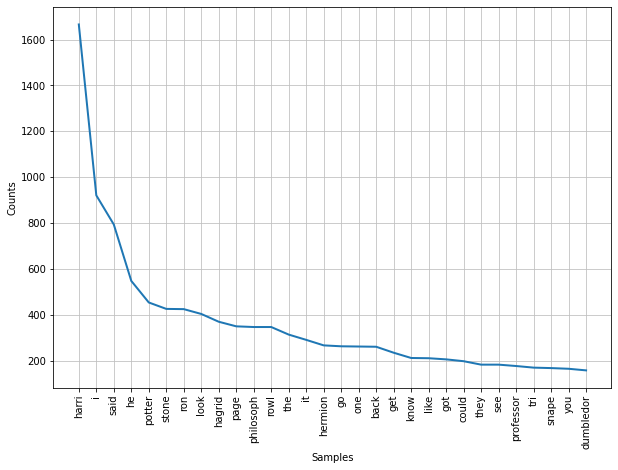

In [31]:
# 30 most common words
plt.figure(figsize=(10,7))
fdist.plot(30, cumulative=False)
plt.show()

# Exercici 4

Realitza sentiment analysis al teu conjunt de dades.

## Sentiment analysis

In [32]:
# Polarity of the text
book_sent = TextBlob(book)
book_sent.sentiment

Sentiment(polarity=0.05043101632256281, subjectivity=0.47569149663568355)

The polarity that ranges between -1 and 1, that is, between negative and positive, in the case of the book is close to 0, indicating that is neutral. 

Regarding the subjectivity that ranges betweem 0 and 1, that is, between objective and subjective, in the case of the book is close to 0.5, that is in a middle point.